In [17]:
import matplotlib.pyplot as plt
import sklearn.datasets as skdata
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

In [18]:
numeros = skdata.load_digits()
target = numeros['target']
imagenes = numeros['images']
n_imagenes = len(target)


data = imagenes.reshape((n_imagenes, -1)) # para volver a tener los datos como imagen basta hacer data.reshape((n_imagenes, 8, 8))
print(np.shape(data))

(1797, 64)


In [19]:
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(data, target, train_size=0.5)


x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


verdaderos_train = 1.0*(y_train==1)
verdaderos_test = 1.0*(y_test==1)

In [20]:
numero = 1
dd = y_train==numero
cov = np.cov(x_train[dd].T)
valores, vectores = np.linalg.eig(cov)
valores = np.real(valores)
vectores = np.real(vectores)
ii = np.argsort(-valores)
valores = valores[ii]
vectores = vectores[:,ii]

proyeccion_train = np.matmul(x_train,vectores)[:,:10]
proyeccion_test = np.matmul(x_test,vectores)[:,:10]
discriminante = LinearDiscriminantAnalysis()
discriminante.fit(proyeccion_train,verdaderos_train)

probabilidades = discriminante.predict_proba(proyeccion_test)

precision_1, recall_1, th_1 = metrics.precision_recall_curve(verdaderos_test,probabilidades[:,1])

In [21]:
numero = 1
dd = y_train!=numero
cov = np.cov(x_train[dd].T)
valores, vectores = np.linalg.eig(cov)
valores = np.real(valores)
vectores = np.real(vectores)
ii = np.argsort(-valores)
valores = valores[ii]
vectores = vectores[:,ii]

proyeccion_train = np.matmul(x_train,vectores)[:,:10]
proyeccion_test = np.matmul(x_test,vectores)[:,:10]
discriminante = LinearDiscriminantAnalysis()
discriminante.fit(proyeccion_train,verdaderos_train)

probabilidades = discriminante.predict_proba(proyeccion_test)

precision_0, recall_0, th_0 = metrics.precision_recall_curve(verdaderos_test,probabilidades[:,1])

In [22]:
numero = 1
cov = np.cov(x_train.T)
valores, vectores = np.linalg.eig(cov)
valores = np.real(valores)
vectores = np.real(vectores)
ii = np.argsort(-valores)
valores = valores[ii]
vectores = vectores[:,ii]

proyeccion_train = np.matmul(x_train,vectores)[:,:10]
proyeccion_test = np.matmul(x_test,vectores)[:,:10]
discriminante = LinearDiscriminantAnalysis()
discriminante.fit(proyeccion_train,verdaderos_train)

probabilidades = discriminante.predict_proba(proyeccion_test)

precision_todos, recall_todos, th_todos = metrics.precision_recall_curve(verdaderos_test,probabilidades[:,1])

In [23]:
import warnings
warnings.filterwarnings('ignore')

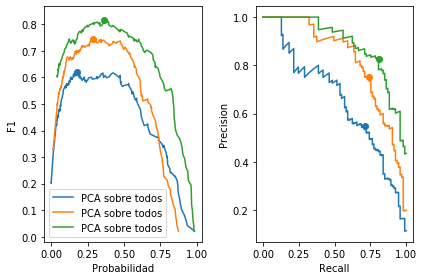

In [24]:
fig, ax = plt.subplots(1,2)


precision,recall,th = precision_1,recall_1,th_1
f1 = 2*(precision*recall)/(precision+recall)
f1 = f1[:-1]

ax[0].plot(th,f1,label='PCA sobre todos')
ax[0].scatter(th[np.argmax(f1)],np.amax(f1))
ax[1].plot(recall,precision)
ax[1].scatter(recall[np.argmax(f1)],precision[np.argmax(f1)])

precision,recall,th = precision_0,recall_0,th_0
f1 = 2*(precision*recall)/(precision+recall)
f1 = f1[:-1]
ax[0].plot(th,f1,label='PCA sobre todos')
ax[0].scatter(th[np.argmax(f1)],np.amax(f1))
ax[1].plot(recall,precision)
ax[1].scatter(recall[np.argmax(f1)],precision[np.argmax(f1)])

precision,recall,th = precision_todos,recall_todos,th_todos
f1 = 2*(precision*recall)/(precision+recall)
f1 = f1[:-1]
ax[0].plot(th,f1,label='PCA sobre todos')
ax[0].scatter(th[np.argmax(f1)],np.amax(f1))
ax[1].plot(recall,precision)
ax[1].scatter(recall[np.argmax(f1)],precision[np.argmax(f1)])

ax[0].set_xlabel('Probabilidad')
ax[0].set_ylabel('F1')
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[0].legend(loc=3)
fig.tight_layout()

fig.savefig('F1_prec_recall.png')